# Types of Feature Scaling

There are two types of feature scaling:
1. Standardization
2. Normalization

# 1. Standardization
Standardization is also called as Z-score Normalization.

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
! conda install -y gdown

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done


In [81]:
! gdown --id 1n7KsYec45yEbSvwX9pqpCcKPbLhOK31v

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1n7KsYec45yEbSvwX9pqpCcKPbLhOK31v
To: /kaggle/working/Social_Network_Ads.csv
100%|██████████████████████████████████████| 10.9k/10.9k [00:00<00:00, 11.2MB/s]


In [82]:
df = pd.read_csv('Social_Network_Ads.csv')

In [83]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [84]:
df = df.iloc[:, 2:]

In [85]:
df.sample(5)

,Age,EstimatedSalary,Purchased
85,31,118000,1
136,20,82000,0
48,30,135000,1
200,35,39000,0
353,37,57000,0


# Train test split

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [88]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [89]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [90]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [91]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


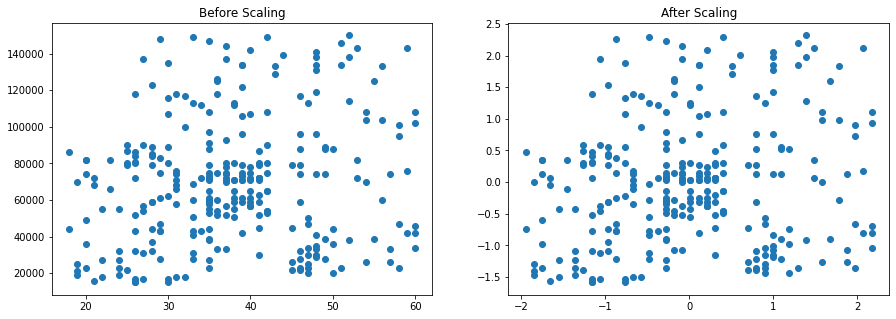

In [92]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'])
ax2.set_title('After Scaling')
plt.show()


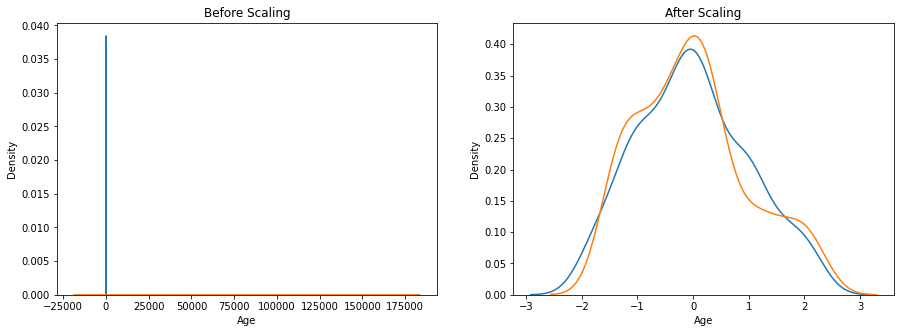

In [93]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

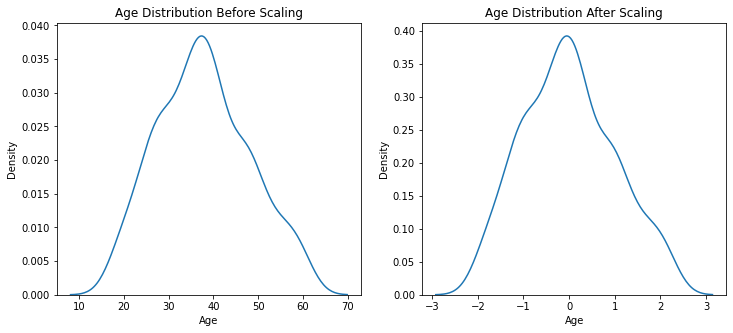

In [94]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
# after scaling
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

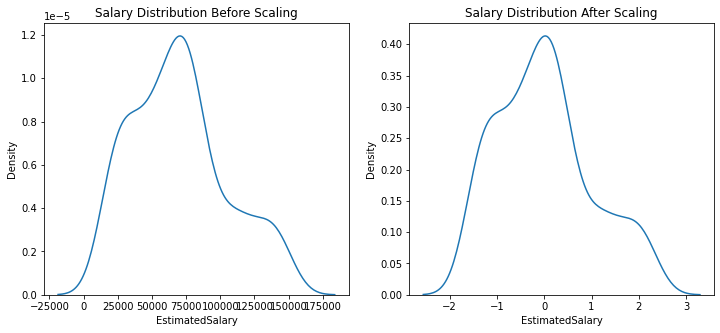

In [95]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
# after scaling
ax2.set_title('Salary Distribution After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why scaling is important?

In [96]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)



LogisticRegression()

In [97]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
print("Actual", accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


# for DecisionTreeClassifier, you don't need to scale the data


In [100]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outliers

In [103]:
df = df.append(pd.DataFrame({"Age":[5,90,95], "EstimatedSalary":[1000,250000,350000], "Purchased":[0,1,1]}), ignore_index=True)


In [104]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


In [106]:
df.describe()

,Age,EstimatedSalary,Purchased
count,403.000000,403.000000,403.000000
mean,37.846154,70714.640199,0.359801
std,11.255343,37959.790969,0.480539
min,5.000000,1000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,95.000000,350000.000000,1.000000


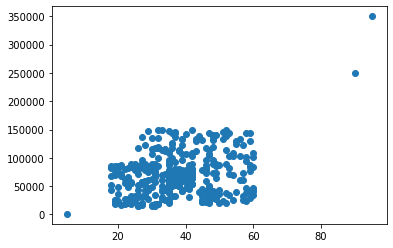

In [108]:
plt.scatter(df["Age"], df["EstimatedSalary"])
plt.show()

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((282, 2), (121, 2))

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

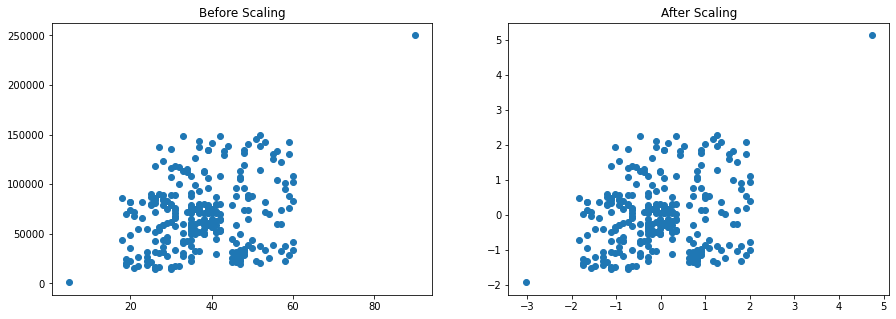

In [112]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'])
ax2.set_title('After Scaling')
plt.show()


# When to use Standardization

We should use Standardization in the following cases:

Algorithms                       Reason of applying feature scaling

1. K-Means-----------------------Use the Euclidean distanc measure
2. K-Nearest-Neighbors-----------Measure the distance between pairs of samples and these distances are influenced by the measurement units.
3. Principla Component Analysis--(PCA) Try to get the feature with maximum variance.
4. Artificial Neural Network-----Apply Gradient Descent
5. Gradient Descent--------------Theta calculation becomes faster after feature scaling and the learning rate in the update equation of                                      Stochastic Gradient Descent is the same for every parameter.

# We don't need to scale data for RandomForestTree, Gradient Boost, Xg Boost 